In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from lazypredict.Supervised import LazyClassifier
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

In [8]:
# Load Dataset

data = pd.read_csv('Churn_Modelling.csv')
df = data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

## Data Cleaning

In [10]:
# Missing Value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Duplicated?
df.duplicated().sum()

0

looks good!

## Describe data

In [12]:
# Drop unecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [13]:
# Separate column by category
cats = list(df.select_dtypes(include=['object']))
nums = list(df.select_dtypes(exclude=['object']))

In [14]:
df[cats].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [15]:
df[nums].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [16]:
# Check Unique value
for col in df.columns:
    c = df[col].nunique()
    print(f'Unique count of {col} is = {c}' )

Unique count of CreditScore is = 460
Unique count of Geography is = 3
Unique count of Gender is = 2
Unique count of Age is = 70
Unique count of Tenure is = 11
Unique count of Balance is = 6382
Unique count of NumOfProducts is = 4
Unique count of HasCrCard is = 2
Unique count of IsActiveMember is = 2
Unique count of EstimatedSalary is = 9999
Unique count of Exited is = 2


## Check distribusi

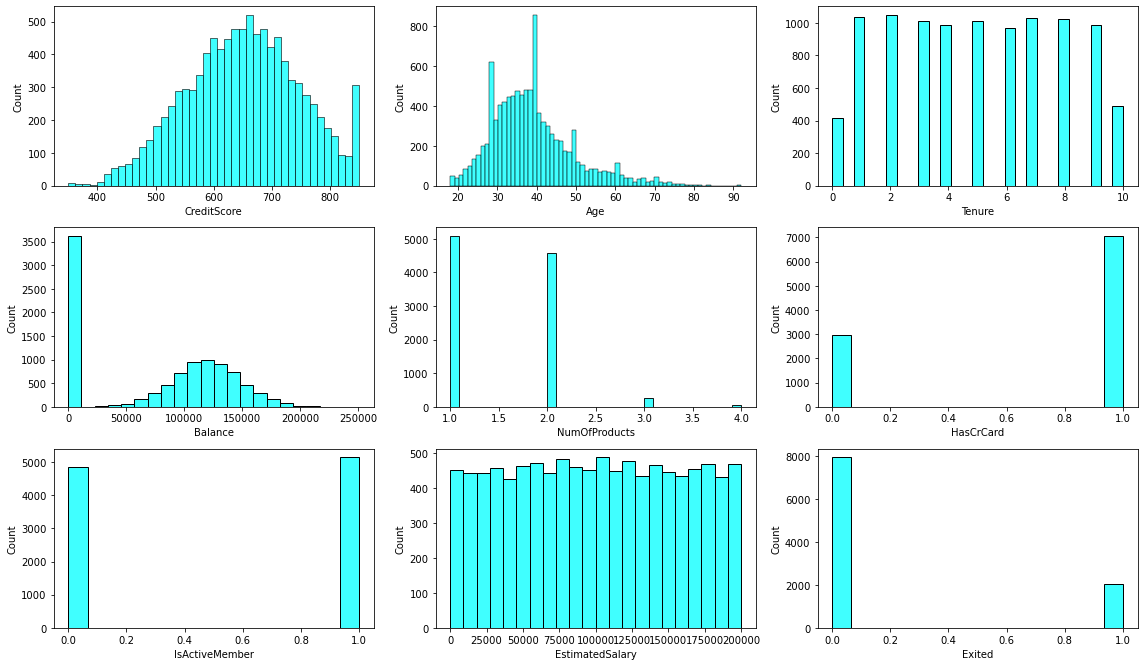

In [17]:
# Density plot (cek distribusi) 
plt.figure(figsize=(16,12))

feature = nums
for i in range(0, len (feature)):
    plt.subplot (4, len (feature) //3, i+1)
    sns.histplot (x=df[feature[i]], color='cyan')
    plt.xlabel(feature[i])
    plt.tight_layout()


note :
- no need to check correlation in classification model if just want to know accuracy
- no need to handling outliers in this step, because accuracy will be drop

## Bivariate Analysis

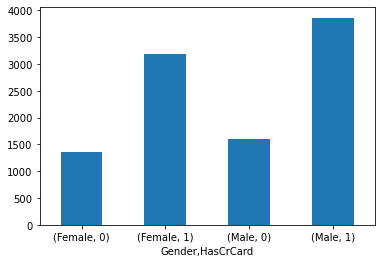

In [18]:
# How many people have credit card or not gender wise
df.groupby(['Gender', 'HasCrCard'])['HasCrCard'].count().plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

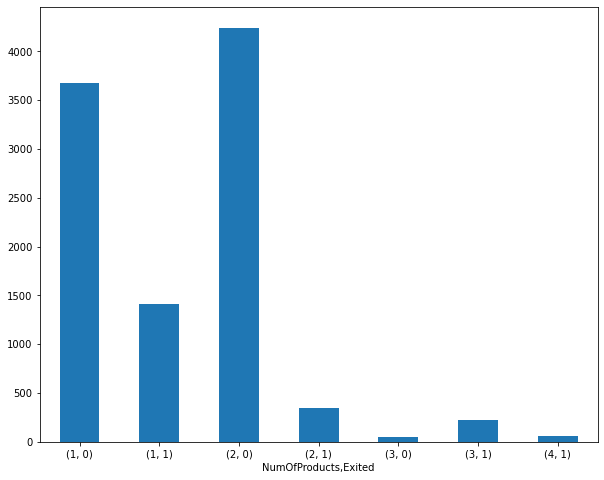

In [19]:
# How many people exited or not, by Number Products
plt.figure(figsize=(10,8))
df.groupby(['NumOfProducts', 'Exited'])['Exited'].count().plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

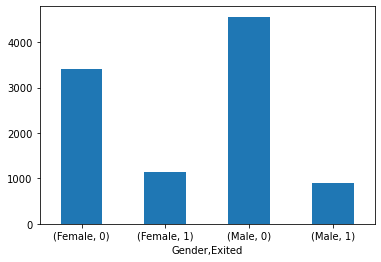

In [20]:
# How many people exited or not gender wise
df.groupby(['Gender', 'Exited'])['Exited'].count().plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

## Data Preprocessing

In [21]:
# Using label encode for 2 value
df['Gender'] = [0 if x == 'Male' else (1) for x in df['Gender']]

In [22]:
# Using one hot encoding for > 2 value (Geography)
df = pd.get_dummies(df)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


### Split data

In [24]:
x = df.drop('Exited', axis=1)
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Note :
- I have tried using scalling after split data. but the result more drop in all accuracy of model

## Modelling

Before trying the models for finding the best accuracy, it can be known the data is not balance.
first we must imbalance data handling

In [25]:
## Balance Data

# Under Sampling Data
rus = RandomUnderSampler(random_state=42)

x_rus, y_rus = rus.fit_resample(x_train, y_train)

print (f'''Shape of x before UnderSampling : {x.shape}
Shape of x after UnderSampling : {x_rus.shape}''')


Shape of x before UnderSampling : (10000, 12)
Shape of x after UnderSampling : (3288, 12)


In [26]:
print(sorted(Counter(y_rus).items()))

[(0, 1644), (1, 1644)]


Note : 
- i use RandomUnderSampler because i have tried using NearMiss and the result drop in accuracy

### Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators=99, max_depth=7)
rf_model = rf.fit(x_rus, y_rus)
y_pred_rf = rf_model.predict(x_test)

### Logistic Regression

In [28]:
lr = LogisticRegression(random_state=42)
lr_model = lr.fit(x_rus, y_rus)
y_pred_lr = lr.predict(x_test)

### KNN Classifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=55, weights='uniform')
knn_model = knn.fit(x_rus, y_rus)
y_pred_knn = knn.predict(x_test)

### Decision Tree

In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt_model = dt.fit(x_rus, y_rus)
y_pred_dt = dt.predict(x_test)

### AdaBoost Classifier

In [31]:
adab = AdaBoostClassifier(n_estimators=100)
adab_model = adab.fit (x_rus, y_rus)
y_pred_adab = adab.predict(x_test)

### XG Boost Classifier

In [32]:
xgb = XGBClassifier(n_estimators=100)
xgb_model = xgb.fit (x_rus, y_rus)
y_pred_xgb = xgb.predict(x_test)

-----

## Evaluation

In [33]:
print ('Akurasi Random Forest', accuracy_score(y_test, y_pred_rf))
print('Akurasi Logistic Regression', accuracy_score(y_test, y_pred_lr))
print('Akurasi KNN', accuracy_score(y_test, y_pred_knn))
print('Akurasi Decision Tree', accuracy_score(y_test, y_pred_dt))
print ('Akurasi AdaBoost', accuracy_score(y_test, y_pred_adab))
print ('Akurasi XGBoost', accuracy_score(y_test, y_pred_xgb))

Akurasi Random Forest 0.8035
Akurasi Logistic Regression 0.636
Akurasi KNN 0.517
Akurasi Decision Tree 0.6765
Akurasi AdaBoost 0.7755
Akurasi XGBoost 0.7675


from the model in above, which the best performance or accuracy is Random Forest. because the accuracy is 80%. it means if we predict Customer Exited from 100 people, able to detect 80 people correctly and accurately then 20 others are wrong.

-----

tbh, for fast steps we can use LazyClassifier.

In [35]:
clf=LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf.fit(x_rus, x_test, y_rus, y_test)
models

100%|██████████| 29/29 [00:13<00:00,  2.09it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.80,0.78,0.78,0.81,0.97
AdaBoostClassifier,0.78,0.78,0.78,0.80,0.53
LGBMClassifier,0.79,0.77,0.77,0.80,0.51
SVC,0.79,0.77,0.77,0.80,1.86
NuSVC,0.78,0.77,0.77,0.80,2.67
XGBClassifier,0.77,0.76,0.76,0.79,0.86
BaggingClassifier,0.79,0.76,0.76,0.80,0.24
ExtraTreesClassifier,0.76,0.75,0.75,0.78,0.74
BernoulliNB,0.72,0.73,0.73,0.75,0.09


## ==========================================

## Thanks